total time: 24.00s, samplerate: 44.10kHz


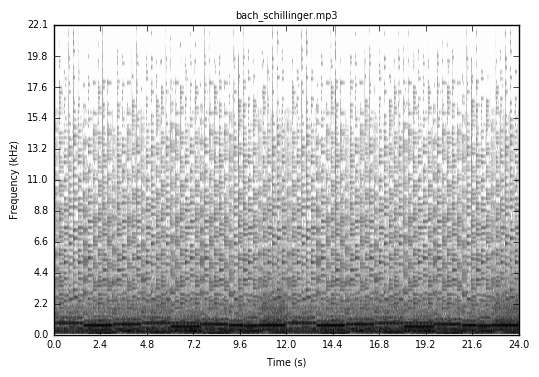

In [1]:
#! /usr/bin/env python

import sys, os.path
from aubio import pvoc, source, float_type
from numpy import zeros, log10, vstack
import matplotlib.pyplot as plt

def get_spectrogram(filename, samplerate = 0):
    win_s = 512                                        # fft window size
    hop_s = win_s // 2                                 # hop size
    fft_s = win_s // 2 + 1                             # spectrum bins

    a = source(filename, samplerate, hop_s)            # source file
    if samplerate == 0: samplerate = a.samplerate
    pv = pvoc(win_s, hop_s)                            # phase vocoder
    specgram = zeros([0, fft_s], dtype=float_type)     # numpy array to store spectrogram

    # analysis
    while True:
        samples, read = a()                              # read file
        specgram = vstack((specgram,pv(samples).norm))   # store new norm vector
        if read < a.hop_size: break

    # plotting
    fig = plt.imshow(log10(specgram.T + .001), origin = 'bottom', aspect = 'auto', cmap=plt.cm.gray_r)
    ax = fig.axes
    ax.axis([0, len(specgram), 0, len(specgram[0])])
    # show axes in Hz and seconds
    time_step = hop_s / float(samplerate)
    total_time = len(specgram) * time_step
    outstr = "total time: %0.2fs" % total_time
    print(outstr + ", samplerate: %.2fkHz" % (samplerate / 1000.))
    n_xticks = 10
    n_yticks = 10

    def get_rounded_ticks( top_pos, step, n_ticks ):
        top_label = top_pos * step
        # get the first label
        ticks_first_label = top_pos * step / n_ticks
        # round to the closest .1
        ticks_first_label = round ( ticks_first_label * 10. ) / 10.
        # compute all labels from the first rounded one
        ticks_labels = [ ticks_first_label * n for n in range(n_ticks) ] + [ top_label ]
        # get the corresponding positions
        ticks_positions = [ ticks_labels[n] / step for n in range(n_ticks) ] + [ top_pos ]
        # convert to string
        ticks_labels = [  "%.1f" % x for x in ticks_labels ]
        # return position, label tuple to use with x/yticks
        return ticks_positions, ticks_labels
  
    # apply to the axis
    x_ticks, x_labels = get_rounded_ticks ( len(specgram), time_step, n_xticks )
    y_ticks, y_labels = get_rounded_ticks ( len(specgram[0]), (samplerate / 1000. / 2.) / len(specgram[0]), n_yticks )
    ax.set_xticks( x_ticks )
    ax.set_yticks ( y_ticks )
    ax.set_xticklabels( x_labels )
    ax.set_yticklabels ( y_labels )
    ax.set_ylabel('Frequency (kHz)')
    ax.set_xlabel('Time (s)')
    ax.set_title(os.path.basename(filename))
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize('x-small')
    return fig


fig = get_spectrogram("midis/bach_schillinger.mp3")
plt.show()

plt.close()

<IPython.core.display.Javascript object>


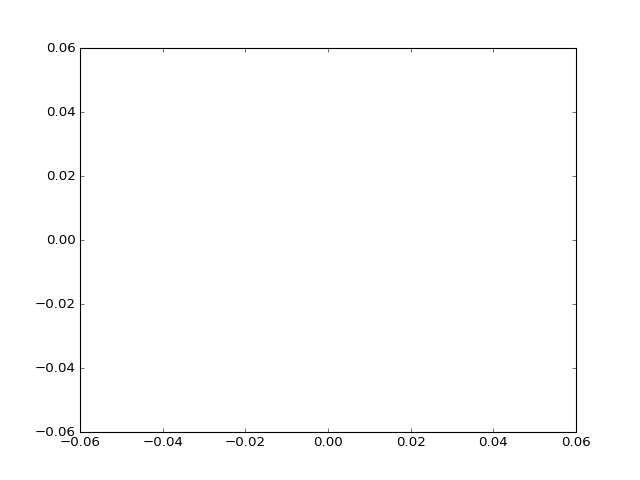

* recording


OSError: [Errno -9981] Input overflowed

In [18]:
%matplotlib notebook
import pyaudio
import wave
import numpy as np
from aubio import pitch

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

CHUNK = 1024
FORMAT = pyaudio.paFloat32
CHANNELS = 1
RATE = 44100
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "output.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("* recording")

frames = []

# Pitch
tolerance = 0.8
downsample = 1
win_s = 4096 // downsample # fft size
hop_s = 1024  // downsample # hop size
pitch_o = pitch("yin", win_s, hop_s, RATE)
pitch_o.set_unit("midi")
pitch_o.set_tolerance(tolerance)


for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    ax.clear()
    
    buffer = stream.read(CHUNK)
    frames.append(buffer)

    signal = np.fromstring(buffer, dtype=np.float32)

    pitch = pitch_o(signal)[0]
    confidence = pitch_o.get_confidence()
    
    
    ax.plot(pitch)
    fig.canvas.draw()
    #plt.pause(0.0001) #Note this correction
    #print("{} / {}".format(pitch,confidence))


print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

'''wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()'''

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


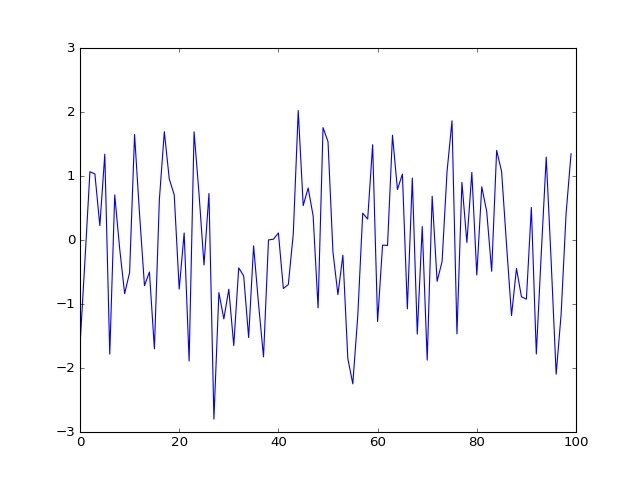

In [11]:


m = 100
n = 100
matrix = np.random.normal(0,1,m*n).reshape(m,n)



for i in range(0,100):
    